# The Effects of Policy H6 on Social Housing

## Affordable Housing in Coventry

### Background

Social rent in the National Planning Policy Framework (NPPF) is defined as housing owned by local authorities and private registered providers (as defined in section 80 of the Housing and Regeneration Act 2008), for which guideline target rents are determined through the national rent regime. It may also be owned by other persons and provided under equivalent rental arrangements to the above, as agreed with the local authority or with the Homes and Communities Agency. It is generally rented at rates far lower than market rate (typically around 30% of market rate) to houses assessed as needing it. Unlike other affordable housing schemes, social rent is the only option that is tied to income levels and is therefore, often the most affordable option, being independent of market rates.

Affordable rent in the NPPF is defined as housing is let by local authorities or private registered providers of social housing to households who are eligible for social rented housing. Affordable Rent is subject to rent controls that require a rent of no more than 80% of the local market rent (including service charges, where applicable). This scheme was introduced in 2011, prior to which affordable housing in the UK only consisted of social rent properties, shared home ownership, and other intermediate rent properties.

Intermediate housing is homes for sale and rent provided at a cost above social rent, but below market levels subject to the criteria in the Affordable Housing definition above. These can include shared equity (shared ownership and equity loans), other low cost homes for sale and intermediate rent, but not affordable rented housing.

Sections 68 to 71 of the Housing and Regeneration Act 2008 defines social housing for the purposes of regulating social landlords as low-cost rental and low-cost homeownership accommodation. The 2008 Act refers to accommodation at rents below market rates and let to people whose needs are not adequately served by the commercial housing market.

Under section 70(2) of the 2008 Act, low-cost home ownership is defined as incorporating shared ownership, equity percentage arrangements and shared ownership trusts. As with low-cost rented housing, these dwellings must be “made available to people whose needs are not adequately served by the commercial housing market” to qualify as social housing. This primarily consisted of social rent homes but in 2012, this included affordable rent homes as well when the government introduced it

In summary, the housing supply in Coventry is divided as follows: The private housing market and the affordable housing market. The affordable housing market consists of social housing and intermediate housing. Social housing is made up of social rent homes and affordable rent homes.

In 2021, there were nearly 13,400 homes on Coventry's social housing registry, Homefinder. Of this, 3,200 were deemed to be high priority applicants, those who the Council owes the main housing duty under the Homelessness Reduction Act, 2018 and considered homeless or those who are threatened with homelessness or currently placed in temporary accomodation. Also in 2021, Homefinder only listed a total of 1,219 homes not even able to service 10% of the demand or the high priority need for social housing. This follows a steady decline in social housing stock that is also seen in the rest of the country [citation needed, figure needed].

Coventry follows the latest NPPF on affordable housing which is reflected in their ten-year Local Plan Housing Policies. Currently, the 2011 Local Plan guidance on affordable housing is from Policy H6 which is as follows:

---
New residential schemes of 25 dwellings or more (excluding student accommodation), or more than 1ha, will be expected to provide 25% of all dwellings as affordable homes. Further, the concentration of social/affordable rent and intermediate rent in new proposals will depend on the existing concentration of affordable dwellings at the four-digit postcode level:

* In areas of high concentration: 10% Social/Affordable Rental Provision; 15% Intermediate Provision
* In areas of medium concentration: 12.5% Social/Affordable Rental Provision; 12.5% Intermediate Provision
* In areas of low concentration: 15% Social/Affordable Rental Provision; 10% Intermediate Provision

Where the specified level of affordable housing cannot be provided, including for reasons of viability, robust evidence must be presented to justify a reduced or alternative form of contribution.

Through appropriate design standards, new affordable housing units must be appropriately integrated within the development and with other affordable homes adjoining the site.

Through engagement with the Council, Registered Providers, and having regard to the recommendations of the SHMA, developers should ensure that affordable housing contributions comprise dwellings of the right size, type, affordability and tenure to meet local needs. 

---

The Plan also identifies a need for 384 additional affordable homes per year to meet their housing needs, and latest SHMA assessments suggest a housing mix where 50% of developments should be large homes (of 3 or more bedrooms). Current Policy H6 is very similar to the 2001 Local Plan policy on affordable housing, Policy H10. Following similar qualifying and concentration requirements, along with exemptions for non-viable sites, the two policies are nearly identical.

The major distinction is that until 2011, there was no affordable rent scheme so affordable housing requirements in the 2001 Local Plan were set such that of the 25% required provision of affordable housing, 12.5% was made up entirely of social rent properties. The introduction of affordable rent in 2011 is reflected in the last Local Plan, where now 12.5% can be _either_ social or affordable rent. With affordable rent payments being much higher than social rent, we expect that developers would choose to favour providing affordable rent properties over the cheaper (for tenants) social rent. As we discuss below, this is reflected in the percentage of affordable housing made up by social rent which since 2011 has been on a steep and steady decline, while the relative composition of affordable housing has been on the rise making up nearly the entirety of affordable housing delivery in Coventry. The trend of erosion of social housing stock is seen nationally as well. 

With rising house prices and rents, falling home affordability, and rising homelessness, the social housing sector plays a critical role in ensuring that people meet their basic needs in the face of financial vulnerability. Thus, while developers in Coventry might be meeting their 25% affordable housing delivery requirements, they might be failing to meet the needs of those who need it the most by preferentially developing properties as affordable rent instead of social rent.

### Method

We begin our analysis looking at the delivery of different components of affordable housing (affordable rent and social rent) within Coventry, comparing them to the overall housing market and the housing requirements set out by the Local Plan. 


Primarily, we are interested in how Policy H6 affects social housing in Coventry specifically, since there are no explicit requirements on social housing within the plan. The Local Plan sets out that new developments with >25 dwellings or >1ha in area must provide 25% of its dwellings as affordable housing. Further, the Local Plan assesses affordable housing need at the first 4 digits of the postcode level to determine areas of high existing stock of social housing (>1,500 properties) and areas of low existing stock of social housing (<500 properties). Anything in between is determined as medium concentration. Within the geographic areas, the provision of affordable housing is as follows:

* In areas of high concentration: 10% Social/Affordable Rental Provision; 15% Intermediate Provision
* In areas of medium concentration: 12.5% Social/Affordable Rental Provision; 12.5% Intermediate Provision
* In areas of low concentration: 15% Social/Affordable Rental Provision; 10% Intermediate Provision

We assume the intention of this policy is to bring up the level of affordable housing in areas of low concentration but is this setting up misaligned incentives? Areas of high concentration of social housing require fewer social houses making it more attractive to developers (because it gets higher rents) reducing the concentration of social housing and areas of low concentration don’t get as much development (because of the higher social/affordable housing requirement).

The Local Plan also recommends that the housing mix of affordable housing should follow the latest SHMA/SHLAA which suggests that houses with 3 or more bedrooms should make up 50% of the housing mix. However, as the 2021 Homefinder data suggests, houses with 3 or more bedrooms only make 14% of socially rented homes. We assume that since Policy H6 does not set out explicit requirements on the size of homes provided within the plan, developers might be building larger homes for the more profitable Intermediate Homes or Affordable Rent sector rather than the social rent sectors which is mostly made up of bedsits, 1BR, and 2BR homes. 

Finally the Council understands that it may not always be possible for developers to provide the full 25% at every site and thus allows developers to make viability arguments and reach alternative solutions such as off-site delivery or commuted sum payments through the S106 developer's contribution agreement. We expect that this avenue has a significant effect on the delivery of socially rented homes in Coventry and may be contributing to the undersupply problem of homes for Coventry's social housing market.



In this report we hope to answer the following questions:

* How has Policy H6 affected social housing specifically?
* Has Policy H6 succesfully rebalanced the concetration of Affordable Housing (and specifically social housing) in Coventry?
* How has Policy H6 affected the housing mix of affordable housing and social housing?
* How have viability arguments/settlements affected the delivery of social housing in Coventry?
* How has the introduction of affordable rent affected social rent delivery?



## Exploring Housing Supply in Coventry

Importing required packages

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We begin this analysis by exploring the housing market of Coventry. We compare net dwellings per year to additional affordable, social, and intermediate housing. We try to identify any trends so it may inform analysis going forward. We also compare affordable housing delivery to the target set by the Council to meet their housing need of 348 homes/year. We also look at how social housing and affordable housing diverges in their delivery and the falling delivery of social housing. Finally, we compare the affordable housing market in Coventry with the rest of the UK.

### Data

For our data on net dwellings, we use the Department for Levelling Up, Housing, and Communities (DLUHC) and Ministry of Housing, Communities and Local Government (MHCLG) Live Table 122 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1035591/Live_Table_122.ods 'Live Table 122'). For our data on additional dwellings for social housing, affordable housing, and intermediate rent - we use DLUHC Live Tables 1006-1008 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1034087/Live_Tables_1006-1009.ods 'Live Table 1006-1009').

The data is prepared for analysis prior to importing, the process is documented in the files titled `netdwellings.ipynb`, `socialrent.ipynb`, `totalaffordablerent.ipynb`, `affordablerent.ipynb`, `affordablehomes.ipynb` and `intermediaterent.ipynb`. 

Total Affordable Rent is the sum of all forms of affordable housing.

#### Importing data

In [210]:
df_netD = pd.read_excel('Net Dwellings by LA, 2001-2021.xlsx',na_values=['..']) # net dwellings
df_SR = pd.read_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')        # socially rented
df_AR = pd.read_excel('Affordable Rent Dwellings by LA, 2011-2021.xlsx')        # affordable rent
df_AH = pd.read_excel('Affordable Home Ownership by LA, 1991-2021.xlsx')        # affordable home ownership
df_IR = pd.read_excel('Intermediate Rent Dwellings by LA, 2003-2021.xlsx')      # intermediate rent
df_TAD = pd.read_excel('Total Affordable Dwellings by LA, 1992-2021.xlsx') # total affordable rent
df_hl = pd.read_excel('Homelessness 2004-2018 by LA.xlsx')                      # homelessness count
df_TD = pd.read_excel('New Dwellings by LA 1980-2021.xlsx',na_values=['..'])    # total new dwellings
df_NP = pd.read_excel('Number of Properties by Tax Band by LA, 1993-2021.xlsx') # number of properties by tax band
df_SD = pd.read_excel('Social Housing Deductions.xlsx')                         # deductions from social housing

In [211]:
for x in [df_netD,df_SR,df_AR,df_AH,df_IR,df_TAD,df_TD,df_NP,df_SD]:
    x.drop(columns='Unnamed: 0',inplace=True)

In [212]:
## code for shape and types of dataframes to be inserted

Collating datasets into a single dataframe for Coventry

In [213]:
dcov = df_TAD[df_TAD.loc[:,'LA']=='Coventry'].copy()
dcov.rename(columns={'new_dwellings':'TAD'},inplace=True)
dcov.reset_index(drop=True,inplace=True)
dcov.head()

,LA_code,LA,year,TAD
0,E08000026,Coventry,1992,127.0
1,E08000026,Coventry,1993,331.0
2,E08000026,Coventry,1994,474.0
3,E08000026,Coventry,1995,371.0
4,E08000026,Coventry,1996,315.0


In [214]:
dcov = pd.merge(dcov,df_netD[['LA_code','year','net dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'net dwellings':'netD'},inplace=True)

In [215]:
dcov = pd.merge(dcov,df_SR[['LA_code','year','new_dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'new_dwellings':'SR'},inplace=True)

In [216]:
dcov = pd.merge(dcov,df_AR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AR'},inplace=True)

In [217]:
dcov = pd.merge(dcov,df_AH[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AH'},inplace=True)

In [218]:
dcov = pd.merge(dcov,df_IR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'IR'},inplace=True)

In [219]:
df_TD.rename(columns={'ONS Code':'LA_code','Local Authority':'LA'},inplace=True)
#df_TD['DC_Total'] = df_TD['DC_Total'].astype(float)

In [220]:
dcov = pd.merge(dcov,df_TD[['LA_code','year','DC_Total']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC_Total':'TD'},inplace=True)

In [221]:
dcov = pd.merge(dcov,df_NP,how='left',on=['LA_code','LA','year'])

In [222]:
dcov = pd.merge(dcov,df_SD,how='left',on=['LA_code','LA','year'])

In [223]:
dcov['AR'].replace(np.nan,0,inplace=True)

In [224]:
dcov['SH'] = dcov['SR'] + dcov['AR']

In [225]:
dcov['netS'] = dcov['SH'] - dcov['total']

In [226]:
dcov.head()

,LA_code,LA,year,TAD,netD,SR,AR,AH,IR,TD,...,all_properties,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,SH,netS
0,E08000026,Coventry,1992,127.0,NaN,102.0,0.0,25.0,NaN,230,...,NaN,0,0,0,0,199.0,0,199.0,102.0,-97.0
1,E08000026,Coventry,1993,331.0,NaN,231.0,0.0,100.0,NaN,390,...,123680.0,0,0,0,0,123.0,0,123.0,231.0,108.0
2,E08000026,Coventry,1994,474.0,NaN,378.0,0.0,96.0,NaN,330,...,123750.0,0,0,0,0,136.0,0,136.0,378.0,242.0
3,E08000026,Coventry,1995,371.0,NaN,271.0,0.0,100.0,NaN,490,...,124340.0,0,0,0,0,144.0,0,144.0,271.0,127.0
4,E08000026,Coventry,1996,315.0,NaN,203.0,0.0,112.0,NaN,530,...,124960.0,0,0,0,0,117.0,0,117.0,203.0,86.0


The dataframe variables are:
* `LA_code`: ONS Code for Local Authority
* `LA`: Local Authority Name
* `year`: Year-end for which data was collected
* `TAD`: Total number of affordable housing (includes social rent, affordable rent, intermediate rent, shared ownership, and any other forms of affordable housing).
* `netD`: Net additional dwellings added to housing stock in the year
* `SR`: Total additional social rent properties in the year
* `AR`: Total additional affordable rent properties in the year
* `AH`: Total additional affordable home ownership properties in the year
* `IR`: Total additoinal intermediate rent properties in the year
* `TD`: Total additional dwellings (all) in the year
* `band_a`-`band_i`: Dwellings added to stock in a year by tax band
* `all_properties`: Total dwellings in the year, cummulative
* `Demolition`: Deductions from social housing stock by demolition in the year
* `Sale`: Deductions from social housing stock by sales in the year
* `total`: Total deductions from social housing stock
* `netS`: Net additional social rent dwellings in the year

In [227]:
dcov_hl = df_hl[df_hl.loc[:,'LA']=='Coventry'].copy()
dcov_hl.head()

,LA_code,LA,households,homeless_acc,homeless_pm,TA,TA_pm,no_accom,year,date
65,E08000026,Coventry,128.000,455,3.554688,12,0.09375,0,2005,2005-01-01
373,E08000026,Coventry,128.000,NaN,NaN,4,0.03125,0,2006,2006-01-01
681,E08000026,Coventry,125.000,336,2.688,13,0.104,0,2007,2007-01-01
989,E08000026,Coventry,124.600,NaN,NaN,44,0.35313,0,2008,2008-01-01
1504,E08000026,Coventry,127.032,550,4.329618,24,0.188929,0,2009,2009-01-01


Collating datasets into single dataframe for national aggregates (mean)

In [228]:
df = df_TAD.groupby('year').mean().rename(columns={'new_dwellings':'TAD'})
df = pd.merge(df, df_netD.groupby('year').mean().rename(columns={'net dwellings':'netD'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_SR.groupby('year').mean().rename(columns={'new_dwellings':'SR'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_AR.groupby('year').mean().rename(columns={'DC':'AR'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_AH.groupby('year').mean().rename(columns={'DC':'AH'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_IR.groupby('year').mean().rename(columns={'DC':'IR'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_TD.groupby('year').mean().rename(columns={'DC_Total':'TD'}),how='left',left_index=True,right_index=True)
df = pd.merge(df, df_SD.groupby('year').mean(),how='left',left_index=True,right_index=True)
df.head()


C:\Users\adnaa\AppData\Local\Temp\ipykernel_31800\1835939811.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df = pd.merge(df, df_TD.groupby('year').mean().rename(columns={'DC_Total':'TD'}),how='left',left_index=True,right_index=True)


,TAD,netD,SR,AR,AH,IR,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total
year,,,,,,,,,,,,,
1992,77.884514,NaN,67.467192,NaN,10.640751,NaN,0.0,0.0,0.0,0.0,136.412429,0.0,136.412429
1993,172.950000,NaN,150.060526,NaN,23.381720,NaN,0.0,0.0,0.0,0.0,106.457627,0.0,106.457627
1994,168.412698,NaN,129.473545,NaN,38.983784,NaN,0.0,0.0,0.0,0.0,126.209040,0.0,126.209040
1995,185.452381,NaN,138.068783,NaN,42.272973,NaN,0.0,0.0,0.0,0.0,122.418079,0.0,122.418079
1996,197.692308,NaN,151.058355,NaN,47.644986,NaN,0.0,0.0,0.0,0.0,89.016949,0.0,89.016949


In [229]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['year'].astype(str), format='%Y')
df

,year,TAD,netD,SR,AR,AH,IR,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,date
0,1992,77.884514,NaN,67.467192,NaN,10.640751,NaN,0.000000,0.000000,0.000000,0.000000,136.412429,0.000000,136.412429,1992-01-01
1,1993,172.950000,NaN,150.060526,NaN,23.381720,NaN,0.000000,0.000000,0.000000,0.000000,106.457627,0.000000,106.457627,1993-01-01
2,1994,168.412698,NaN,129.473545,NaN,38.983784,NaN,0.000000,0.000000,0.000000,0.000000,126.209040,0.000000,126.209040,1994-01-01
3,1995,185.452381,NaN,138.068783,NaN,42.272973,NaN,0.000000,0.000000,0.000000,0.000000,122.418079,0.000000,122.418079,1995-01-01
4,1996,197.692308,NaN,151.058355,NaN,47.644986,NaN,0.000000,0.000000,0.000000,0.000000,89.016949,0.000000,89.016949,1996-01-01
5,1997,154.070845,NaN,115.708447,NaN,39.217270,NaN,0.000000,0.000000,0.000000,0.000000,93.802260,0.000000,93.802260,1997-01-01
6,1998,130.038356,NaN,98.027397,NaN,32.728291,NaN,24.735955,0.000000,0.000000,0.000000,116.092697,0.000000,140.828652,1998-01-01
7,1999,116.629121,NaN,92.759669,NaN,25.067797,NaN,24.500000,0.000000,0.000000,0.000000,113.123596,0.000000,137.623596,1999-01-01
8,2000,96.395604,NaN,79.538674,NaN,17.754237,NaN,28.154494,0.000000,1.522472,0.272472,152.390449,0.000000,182.339888,2000-01-01
9,2001,91.074176,NaN,74.803867,NaN,17.152542,NaN,39.084270,0.000000,1.345506,0.328652,147.134831,0.000000,187.893258,2001-01-01


In [270]:
df['AR'].replace(np.nan,0,inplace=True)
df['SH'] = df['SR'] + df['AR']
df['netS'] = df['SH'] - df['total']

### Analysis

#### Summary Statistics

First, for Coventry alone:

In [230]:
dcov['TD'] = dcov['TD'].astype(float)

In [231]:
dcov[[x for x in dcov.columns[3:]]].describe()

,TAD,netD,SR,AR,AH,IR,TD,band_a,band_b,band_c,...,all_properties,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,SH,netS
count,30.000000,20.000000,30.000000,30.000000,30.000000,18.000000,27.000000,29.000000,29.000000,29.000000,...,29.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.00000
mean,273.533333,924.150000,136.300000,44.866667,73.700000,12.444444,628.888889,55142.068966,39171.034483,21658.965517,...,132082.758621,20.533333,7.266667,7.233333,0.0,54.800000,24.633333,114.466667,181.166667,66.70000
std,111.972821,471.909812,88.817577,79.821669,55.964367,17.657600,244.215122,2064.221367,2141.081744,1359.643716,...,7001.863475,40.437891,11.521893,12.483598,0.0,85.041329,41.453325,96.796884,75.871526,113.45701
min,100.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,230.000000,52710.000000,36050.000000,20180.000000,...,123680.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,76.000000,-191.00000
25%,180.250000,629.250000,78.250000,0.000000,27.250000,0.000000,470.000000,53760.000000,37400.000000,20510.000000,...,126630.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,123.000000,-3.25000
50%,255.000000,915.000000,112.000000,0.000000,76.000000,1.000000,570.000000,54160.000000,38710.000000,21200.000000,...,129830.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,129.500000,179.000000,85.50000
75%,356.250000,1114.000000,199.000000,70.500000,103.000000,26.000000,800.000000,56140.000000,40760.000000,22520.000000,...,136550.000000,27.250000,15.250000,14.500000,0.0,121.500000,47.500000,162.500000,231.000000,130.00000
max,524.000000,2241.000000,378.000000,278.000000,233.000000,50.000000,1220.000000,60840.000000,43270.000000,24530.000000,...,147930.000000,167.000000,36.000000,43.000000,0.0,298.000000,163.000000,318.000000,378.000000,291.00000


Firstly, note that not all datasets cover the full range of years as seen in the `count` row. Let's examine the summary statistics for the years 2003-2021.

In [232]:
dcov_t = dcov[dcov.loc[:,'year']>2002].copy()

In [233]:
dcov_ss = dcov_t[[x for x in dcov_t.columns[3:]]].describe()
dcov_ss

,TAD,netD,SR,AR,AH,IR,TD,band_a,band_b,band_c,...,all_properties,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,SH,netS
count,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,17.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000
mean,291.736842,943.000000,112.263158,70.842105,79.157895,12.444444,748.235294,55912.105263,40325.789474,22312.105263,...,135537.894737,26.105263,11.473684,11.421053,0.0,0.0,38.894737,87.894737,183.105263,95.210526
std,108.025122,477.042742,79.194446,91.229420,64.077439,17.657600,223.109707,2163.717426,1698.317193,1241.932092,...,6233.165398,42.636571,12.764397,14.163003,0.0,0.0,46.722460,93.176591,67.001571,98.285626
min,111.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,360.000000,53470.000000,38000.000000,20640.000000,...,127810.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,85.000000,-99.000000
25%,210.500000,670.500000,70.000000,0.000000,28.000000,0.000000,570.000000,54030.000000,38880.000000,21285.000000,...,130335.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,128.500000,41.500000
50%,298.000000,918.000000,94.000000,0.000000,75.000000,1.000000,710.000000,55570.000000,40130.000000,22220.000000,...,134620.000000,0.000000,10.000000,1.000000,0.0,0.0,21.000000,106.000000,168.000000,96.000000
75%,365.000000,1119.000000,142.000000,137.000000,116.000000,26.000000,870.000000,57085.000000,41585.000000,23215.000000,...,139685.000000,32.000000,21.000000,19.500000,0.0,0.0,76.500000,153.500000,234.500000,142.000000
max,524.000000,2241.000000,291.000000,278.000000,233.000000,50.000000,1220.000000,60840.000000,43270.000000,24530.000000,...,147930.000000,167.000000,36.000000,43.000000,0.0,0.0,163.000000,283.000000,303.000000,291.000000


In [234]:
dcov_ss.loc['mean','TAD']/dcov_ss.loc['mean','netD']

0.3093709884467266

Now that counts are more similar, we can see that on average Coventry provided around 292 additional dwellings as affordable homes between 2003-2021. In the same period, the average net delivery of all homes in Coventry was 943 homes which implies that the average delivery of affordable rent homes was 30.9% of the net delivery. This is above the required 25% delivery, a quick scan of the recent development sites reveals that while many developments only meet the 25% minimum requirement or fall below, certain development sites contribute 100% of dwellings towards affordable housing<sup>[citation needed]</sup>

In the same period, Coventry provided an average of 112 socially rented dwellings, about 40% of total affordable dwellings and 12.36% of net dwellings. Affordable rented homes alone makes up 46% of total affordable homes in Coventry, the remaining portioon is made up of affordable home ownership, intermediate rent homes, and shared home ownership.

Visualising density plots

In [235]:
import itertools
comb = itertools.product(range(3),repeat=2)
comb = list(comb)
comb.append((3,0))

In [236]:
for x in [2,4,6]:
    del comb[x]

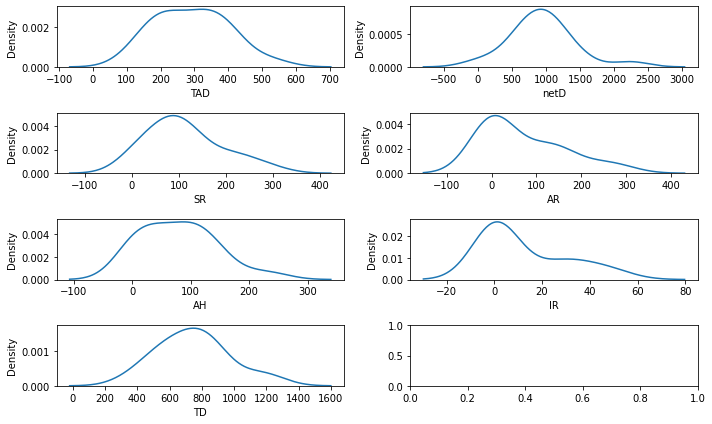

In [237]:
f, axs = plt.subplots(4,2,figsize=(10,6))
for k,a in enumerate(comb):
    sns.kdeplot(data=dcov_t,x=dcov_t.columns[3:][k],ax=axs[a])
f.tight_layout()


In [238]:
## analysis

#### Exploring time trends

First, creating a datetime variable from `year`

In [239]:
dcov['date'] = pd.to_datetime(dcov['year'].astype(str), format='%Y')
dcov.head()

,LA_code,LA,year,TAD,netD,SR,AR,AH,IR,TD,...,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,SH,netS,date
0,E08000026,Coventry,1992,127.0,NaN,102.0,0.0,25.0,NaN,230.0,...,0,0,0,0,199.0,0,199.0,102.0,-97.0,1992-01-01
1,E08000026,Coventry,1993,331.0,NaN,231.0,0.0,100.0,NaN,390.0,...,0,0,0,0,123.0,0,123.0,231.0,108.0,1993-01-01
2,E08000026,Coventry,1994,474.0,NaN,378.0,0.0,96.0,NaN,330.0,...,0,0,0,0,136.0,0,136.0,378.0,242.0,1994-01-01
3,E08000026,Coventry,1995,371.0,NaN,271.0,0.0,100.0,NaN,490.0,...,0,0,0,0,144.0,0,144.0,271.0,127.0,1995-01-01
4,E08000026,Coventry,1996,315.0,NaN,203.0,0.0,112.0,NaN,530.0,...,0,0,0,0,117.0,0,117.0,203.0,86.0,1996-01-01


Creating a trimmed dataset from 2002 onwards only

In [240]:
dcov_t = dcov[dcov.loc[:,'year']>2001].copy()

In [241]:
dcov_t.head()

,LA_code,LA,year,TAD,netD,SR,AR,AH,IR,TD,...,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,SH,netS,date
10,E08000026,Coventry,2002,140.0,566.0,76.0,0.0,64.0,NaN,NaN,...,0,0,0,0,0.0,0,0.0,76.0,76.0,2002-01-01
11,E08000026,Coventry,2003,320.0,624.0,218.0,0.0,102.0,NaN,810.0,...,0,0,0,0,0.0,0,0.0,218.0,218.0,2003-01-01
12,E08000026,Coventry,2004,111.0,-8.0,98.0,0.0,13.0,0.0,NaN,...,0,0,0,0,0.0,0,0.0,98.0,98.0,2004-01-01
13,E08000026,Coventry,2005,174.0,308.0,131.0,0.0,43.0,0.0,NaN,...,0,0,0,0,0.0,0,0.0,131.0,131.0,2005-01-01
14,E08000026,Coventry,2006,172.0,631.0,122.0,0.0,50.0,0.0,520.0,...,0,0,0,0,0.0,0,0.0,122.0,122.0,2006-01-01


Creating columns for affordable rent homes as a percentage of net dwellings

In [242]:
dcov_t['netS_p'] = dcov_t['netS']/dcov_t['netD']*100
dcov_t['TAD_p'] = dcov_t['TAD']/dcov_t['netD']*100
dcov_t['SR_p'] = dcov_t['SR']/dcov_t['netD']*100
dcov_t['AR_p'] = dcov_t['AR']/dcov_t['netD']*100
for x in ['TAD_p','SR_p','AR_p','netS_p']:
    dcov_t.loc[12,x] = pd.NA

Social rent and affordable rent sectors as a percentage of affordable housing

In [253]:
dcov_t['SR/TAD'] = dcov_t['SR']/dcov_t['TAD']*100
dcov_t['AR/TAD'] = dcov_t['AR']/dcov_t['TAD']*100
dcov_t['netS/TAD'] = dcov_t['netS']/dcov_t['TAD']*100

Visualising delivery of housing in Coventry 

In [254]:
dcov_t['AH_req'] = 0.25*dcov_t.loc[dcov_t.year>2010,'netD']

Assuming that affordable housing should be 25% of net dwellings (in reality would only be 25% of _large_ developments). This is represented by the red line in the graph below.  

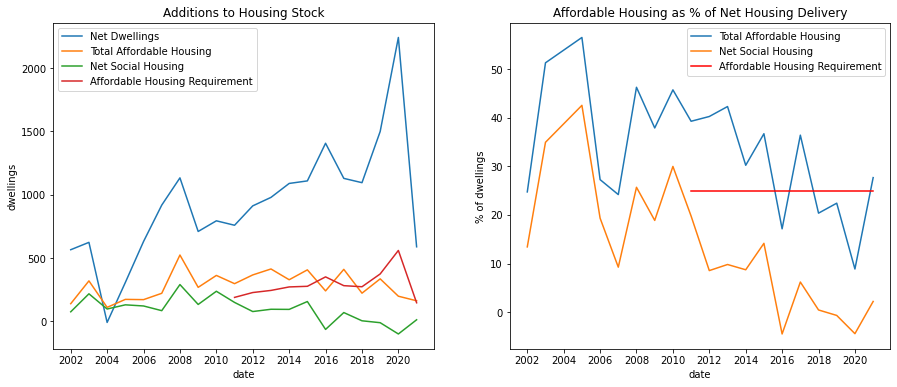

In [255]:
dcov_t['AH_req/netD'] = 25
fig,axs = plt.subplots(1,2,figsize=(15,6))
ax0 = sns.lineplot(x='date',y='netD',data=dcov_t,ax=axs[0])
ax1 = sns.lineplot(x='date',y='TAD',data=dcov_t,ax=axs[0])
ax2 = sns.lineplot(x='date',y='netS',data=dcov_t,ax=axs[0])
ax3 = sns.lineplot(x='date',y='AH_req',data=dcov_t,ax=axs[0])
ax4 = sns.lineplot(x='date',y='TAD_p',data=dcov_t,ax=axs[1])
ax5 = sns.lineplot(x='date',y='netS_p',data=dcov_t,ax=axs[1])
ax6 = sns.lineplot(x='date',y='AH_req/netD',data=dcov_t[dcov_t.loc[:,'year']>=2011],color='red',ax=axs[1])
axs[0].legend(['Net Dwellings','Total Affordable Housing','Net Social Housing','Affordable Housing Requirement'])
axs[0].set_ylabel('dwellings')
axs[0].set_title('Additions to Housing Stock')
axs[1].legend(['Total Affordable Housing','Net Social Housing','Affordable Housing Requirement'])
axs[1].set_ylabel('% of dwellings')
axs[1].set_title('Affordable Housing as % of Net Housing Delivery')
ax4.invert_yaxis()
fig.set_facecolor('white')

Affordable housing delivery started off being greater than the actual delivery required but has shown a falling trend in recent years. Let's visualise the percentage of total housing made up by affordable housing, social rent, and affordable rent.

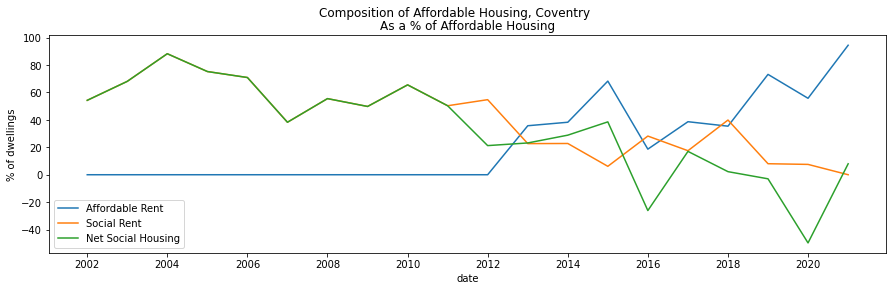

In [256]:
fig1, axs = plt.subplots(figsize=(15,4))
ax1 = sns.lineplot(x='date',y='AR/TAD',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR/TAD',data=dcov_t)
ax3 = sns.lineplot(x='date',y='netS/TAD',data=dcov_t)
axs.legend(['Affordable Rent','Social Rent','Net Social Housing'])
axs.set_ylabel('% of dwellings')
axs.set_title('As a % of Affordable Housing')
ax0.invert_yaxis()
fig1.suptitle('Composition of Affordable Housing, Coventry')
fig1.set_facecolor('white')

Until 2012, socially rented housing made up the majority of the supply of affordable housing in Coventry. Since, 2012 while affordable rent supply has been rising, the delivery of socially rented has been falling making up only about 25% of the affordable housing delivery, and has nearly fallen to 0 in recent years. This implies that recent growth in affordable housing delivery is almost completely made up of affordable rent development. Further, when accounting for deductions from social housing stock, net social housing makes up a very small percentage of afordable housing delivery (and even negative in some years), this might explain the undersupply of social housing in Homefinder.

It seems like the 25% affordable housing requirement is being met for most years since 2011, except for the significant dip in 2020, which is attributed to delays in development from the COVID-19 pandemic and subsequent lockdowns according to the Authority Monitoring Report 2020/21. Again, we point out the significant drop in social rented properties since 2011. 

The Local Plan recommends an annual growth of 348 additional affordable homes per year to meet their affordable housing need. Similarly, it assesses that between 2011-2016, annual growth of total dwellings should be 1,020 homes per annum, and from 2017-2031, annual growth should increase to 1,300 homes per annum. 

In [257]:
for x in dcov_t.index:
    if dcov_t.loc[x,'year'] in range(2011,2017):
        dcov_t.loc[x,'AR_set'] = 348
        dcov_t.loc[x,'netD_set'] = 1020
    elif dcov_t.loc[x,'year'] >= 2017:
        dcov_t.loc[x,'netD_set'] = 1300
        dcov_t.loc[x,'AR_set'] = 348

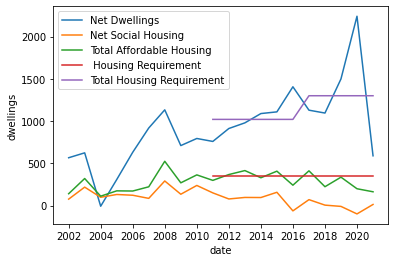

In [258]:
fig,ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='netD',data=dcov_t)
ax1 = sns.lineplot(x='date',y='netS',data=dcov_t)
ax2 = sns.lineplot(x='date',y='TAD',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_set',data=dcov_t)
ax4 = sns.lineplot(x='date',y='netD_set',data=dcov_t)
#ax4 = sns.lineplot(x='date',y='AR_req',data=dcov_t)
plt.legend(['Net Dwellings','Net Social Housing','Total Affordable Housing',' Housing Requirement','Total Housing Requirement'])
plt.ylabel('dwellings')
fig.set_facecolor('white')

While delivery is above the 25% requirement, affordable housing delivery is still under the assessed 348 homes/year needed to meet Coventry's affordable housing needs. Let's evaluate by how much. And net social housing is far below 174 homes/year (50% of affordable housing requirement), at nearly 0 homes a year in the last few years.

In [259]:
dcov_t['TAD_deficit'] = dcov_t['TAD'] - dcov_t['AR_set']
dcov_t['netD_deficit'] = dcov_t['netD'] - dcov_t['netD_set']

In [260]:
print('Average number of affordable houses v. assessed need: ',dcov_t['TAD_deficit'].mean())
print('Average number of total dwellings v. assessed need: ',dcov_t['netD_deficit'].mean())

Average number of affordable houses v. assessed need:  -40.0
Average number of total dwellings v. assessed need:  17.0


On average, affordable housing is 40 homes below the needed 348 homes per year assessed by the Local Plan. On the other hand, total dwellings are above the assessed need at an average of 17 homes per year. While in some years, there was a deficit in total housing supply, prior years' surplus helped to make up up for any deficits. 

In [262]:
dcov_t['TAD_deficit_a'] = dcov_t['TAD'] - dcov_t['AH_req']

In [263]:
print('Average number of affordable houses v. 25% requirement: ',dcov_t['TAD_deficit_a'].mean())

Average number of affordable houses v. 25% requirement:  16.931818181818183


If instead looking at actual 25% requirement, affordable housing overdelivers by 17 homes per year on average but yet there is an undersupply, probably explained by deductions from social housing stock.

#### Homelessness Figures

In [265]:
dcov_hl.head()

,LA_code,LA,households,homeless_acc,homeless_pm,TA,TA_pm,no_accom,year,date
65,E08000026,Coventry,128.000,455,3.554688,12,0.09375,0,2005,2005-01-01
373,E08000026,Coventry,128.000,NaN,NaN,4,0.03125,0,2006,2006-01-01
681,E08000026,Coventry,125.000,336,2.688,13,0.104,0,2007,2007-01-01
989,E08000026,Coventry,124.600,NaN,NaN,44,0.35313,0,2008,2008-01-01
1504,E08000026,Coventry,127.032,550,4.329618,24,0.188929,0,2009,2009-01-01


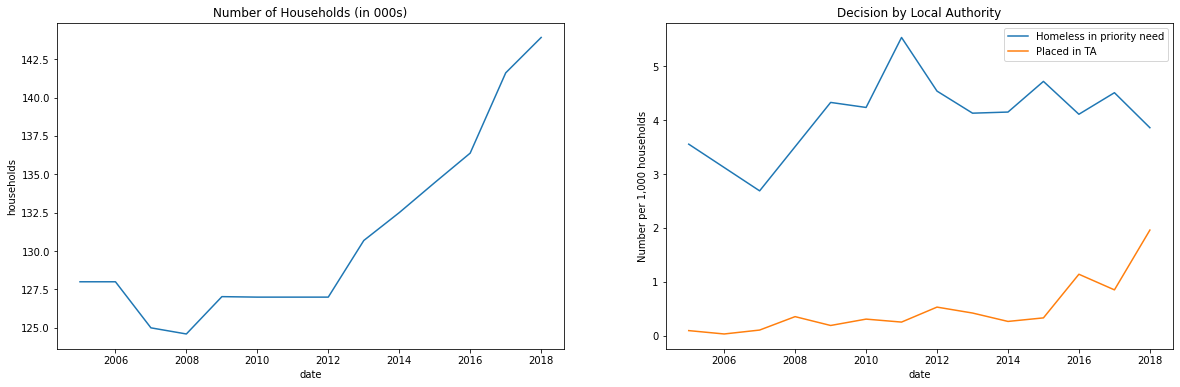

In [266]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
ax0 = sns.lineplot(x='date',y='households',data=dcov_hl,ax=axs[0])
ax1 = sns.lineplot(x='date',y='homeless_pm',data=dcov_hl,ax=axs[1])
ax2 = sns.lineplot(x='date',y='TA_pm',data=dcov_hl,ax=axs[1])
axs[0].set_title('Number of Households (in 000s)')
axs[1].set_title('Decision by Local Authority')
axs[1].legend(['Homeless in priority need','Placed in TA'])
axs[1].set_ylabel('Number per 1,000 households')
fig.set_facecolor('white')

While the population of Coventry has grown considerable since 2012, the homelessness population has remained relatively stable at around 4 homeless households for every 1,000 households.

#### National Statistics

Trimming the dataset to only years from 2002 onwards

In [271]:
df_t = df[df.loc[:,'year']>2001].copy()

In [272]:
df_t.head()

,year,TAD,netD,SR,AR,AH,IR,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,date,SH,netS
10,2002,90.700549,414.419261,74.060773,0.0,17.528249,NaN,40.735955,0.0,0.800562,0.426966,145.977528,0.0,187.941011,2002-01-01,74.060773,-113.880238
11,2003,90.447802,451.624063,66.174033,0.0,25.333333,NaN,31.752809,0.0,1.418539,0.971910,178.073034,0.0,212.216292,2003-01-01,66.174033,-146.042259
12,2004,104.585165,482.963046,62.599448,0.0,42.723164,0.802260,23.848315,0.0,0.879213,0.926966,195.441011,0.0,221.095506,2004-01-01,62.599448,-158.496058
13,2005,102.939560,524.160266,59.872928,0.0,40.347458,4.274011,24.092697,0.0,1.783708,0.193820,140.401685,0.0,166.471910,2005-01-01,59.872928,-106.598982
14,2006,123.200549,572.465871,63.453039,0.0,57.062147,4.731638,17.542135,0.0,1.098315,0.168539,74.872098,0.0,93.681086,2006-01-01,63.453039,-30.228048


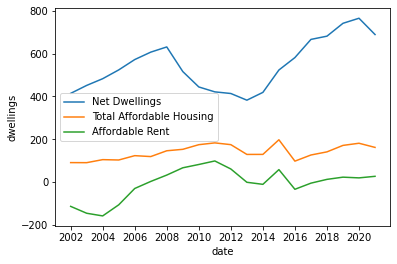

In [273]:
fig, ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='netD',data=df_t)
ax1 = sns.lineplot(x='date',y='TAD',data=df_t)
ax2 = sns.lineplot(x='date',y='netS',data=df_t)
plt.legend(['Net Dwellings', 'Total Affordable Housing','Affordable Rent','Social Rent'])
plt.ylabel('dwellings')
fig.set_facecolor('white')

Creating columns for affordable housing as a percentage of net dwellings and as a percentage of total affordable housing

In [274]:
df_t['TAD_p'] = df_t['TAD']/df_t['netD']*100
df_t['SH_p'] = df_t['SH']/df_t['netD']*100

df_t['SH/TAD'] = df_t['SH']/df_t['TAD']*100

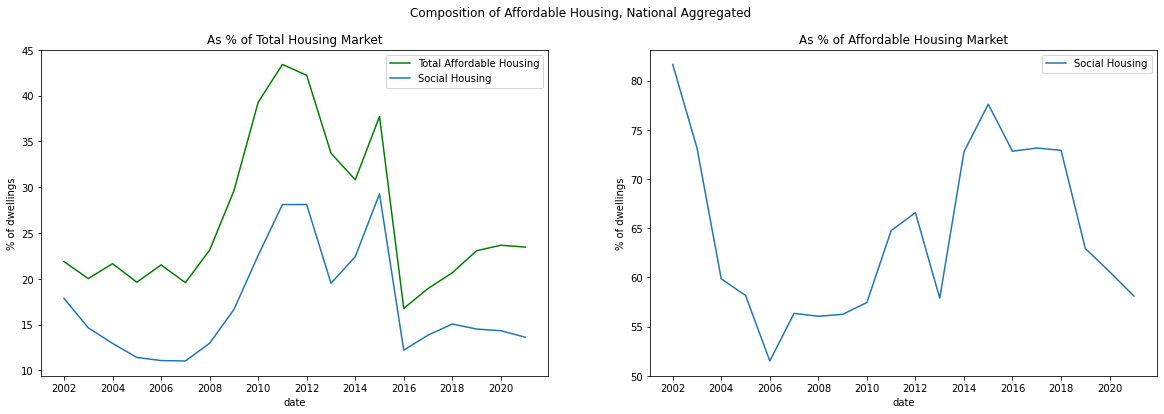

In [276]:
fig2, axs = plt.subplots(1,2,figsize=(20,6))
ax1 = sns.lineplot(x='date',y='TAD_p',data=df_t,ax=axs[0],color='green')
ax2 = sns.lineplot(x='date',y='SH_p',data=df_t,ax=axs[0])
ax5 = sns.lineplot(x='date',y='SH/TAD',data=df_t,ax=axs[1])
axs[0].legend(['Total Affordable Housing','Social Housing'])
axs[0].set_ylabel('% of dwellings')
axs[0].set_title('As % of Total Housing Market')
axs[1].legend(['Social Housing'])
axs[1].set_ylabel('% of dwellings')
axs[1].set_title('As % of Affordable Housing Market')
fig2.suptitle('Composition of Affordable Housing, National Aggregated')
fig2.set_facecolor('white')

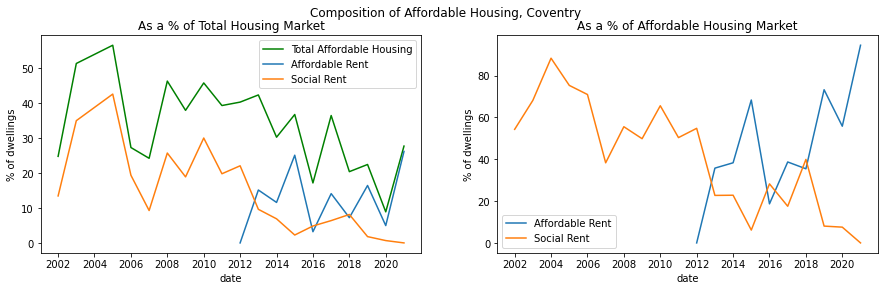

In [52]:
fig1

As we can see, there are similar trends in both the national average as well as the Coventry housing market, as affordable rent housing was introduced and rising, the proportion of social rent properties have fallen considerably. However, this may very well be spurious correlation and we must establish a causal relationship.


Let's examine net social housing which is additional social housing dwelling per year net of demolitions and sales throught Right to Buy per year.

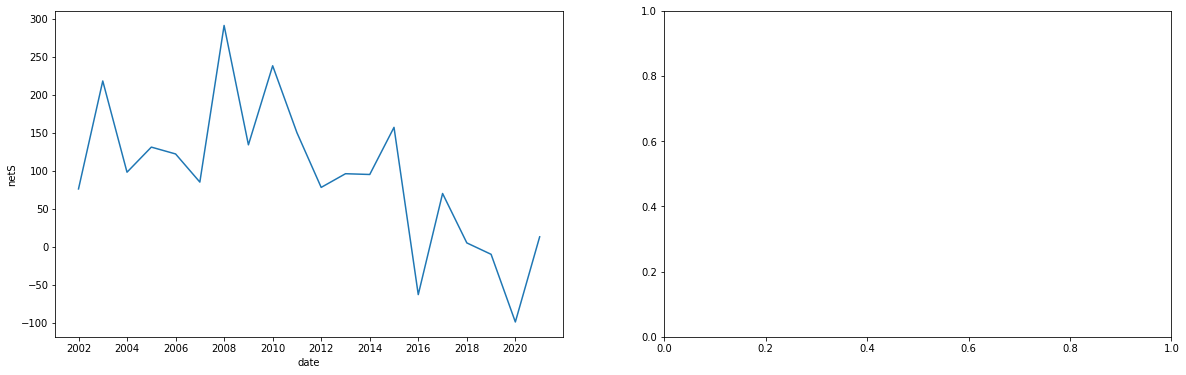

In [96]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
ax0 = sns.lineplot(x='date',y='netS',data=dcov_t,ax=axs[0])




#### Correlation Estimates

In [54]:
from scipy.stats import pearsonr

In [55]:
dcov_t

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,...,AR_p,SR/TAR,AR/TAR,AR_req,AR_req/netD,AR_set,netD_set,TAR_deficit,netD_deficit,TAR_deficit_a
10,E08000026,Coventry,2002,140.0,566.0,76.0,NaN,64.0,NaN,NaN,...,NaN,54.285714,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
11,E08000026,Coventry,2003,320.0,624.0,218.0,NaN,102.0,NaN,810.0,...,NaN,68.125000,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
12,E08000026,Coventry,2004,111.0,-8.0,98.0,NaN,13.0,0.0,NaN,...,<NA>,88.288288,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
13,E08000026,Coventry,2005,174.0,308.0,131.0,NaN,43.0,0.0,NaN,...,NaN,75.287356,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
14,E08000026,Coventry,2006,172.0,631.0,122.0,NaN,50.0,0.0,520.0,...,NaN,70.930233,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
15,E08000026,Coventry,2007,222.0,918.0,85.0,NaN,137.0,0.0,870.0,...,NaN,38.288288,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
16,E08000026,Coventry,2008,524.0,1133.0,291.0,NaN,233.0,0.0,1130.0,...,NaN,55.534351,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
17,E08000026,Coventry,2009,269.0,710.0,134.0,NaN,103.0,32.0,560.0,...,NaN,49.814126,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
18,E08000026,Coventry,2010,363.0,794.0,238.0,NaN,75.0,50.0,360.0,...,NaN,65.564738,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
19,E08000026,Coventry,2011,298.0,759.0,150.0,NaN,103.0,45.0,480.0,...,NaN,50.335570,NaN,189.75,25,348.0,1020.0,-50.0,-261.0,108.25


Pearson Correlation Coefficient: -0.607401506707538, p-value: 0.06253157405820098


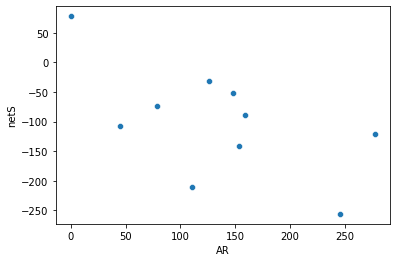

In [56]:
sns.scatterplot(x='AR',y='netS',data=dcov_t)
corr, pval = pearsonr(dcov_t.loc[20:,'AR'],dcov_t.loc[20:,'netS'])
print(f'Pearson Correlation Coefficient: {corr}, p-value: {pval}')

Pearson Correlation Coefficient: -0.2978342683883413, p-value: 0.2021771898962427


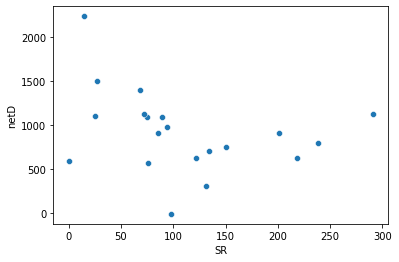

In [57]:
sns.scatterplot(x='SR',y='netD',data=dcov_t)
corr, pval = pearsonr(dcov_t['SR'],dcov_t['netD'])
print(f'Pearson Correlation Coefficient: {corr}, p-value: {pval}')

In [99]:
SR_2021 = 19767
D_2021 = 148218
AR_2021 = 2248

In [277]:
dcov_t.loc[29,'SH_Total'] = SR_2021 + AR_2021
for x in dcov_t.index.sort_values(ascending=False)[1:]:
    dcov_t.loc[x,'SH_Total'] = dcov_t.loc[x+1,'SH_Total'] - dcov_t.loc[x,'netS']


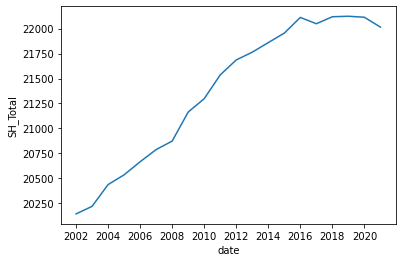

In [278]:
fig, ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='SH_Total',data=dcov_t)

In [279]:
dcov_t.loc[29,'D_Total'] = D_2021
for x in dcov_t.index.sort_values(ascending=False)[1:]:
    dcov_t.loc[x,'D_Total'] = dcov_t.loc[x+1,'D_Total'] - dcov_t.loc[x,'netD']

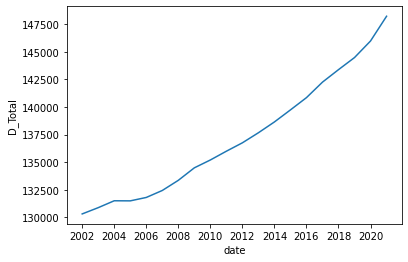

In [281]:
fig, ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='D_Total',data=dcov_t)